### Asking scientific questions of models - Exercises & Answers

The exercises here are designed to get you comfortable using models to make predictions and having them answer questions of interest, as opposed to relying on a suite of tests picked from a flowchart.

## Traditional approaches from a model-based perspective
To get things clear, lets do some standard approaches such as t-tests and ANOVAs from the perspective of a linear model. We won't interpret the coefficients, we'll just get the model to tell us the answer directly and compare it to the traditional answer.

### a. Imports
Import `pandas`, `pingouin`, `statsmodels.formula.api`, `seaborn`, and also `marginaleffects`.

In [1]:
# Your answer here
import pandas as pd
import pingouin as pg
import statsmodels.formula.api as smf
import seaborn as sns
import marginaleffects as me

sns.set_style('whitegrid')

### b. Loading up data
We will continue our exploration of the 'Teaching Ratings' dataset here, and use `marginaleffects` to explore the consequences of our models.

The data can be found here: https://vincentarelbundock.github.io/Rdatasets/csv/AER/TeachingRatings.csv

Read it into a dataframe called `profs`, and show the top 5 rows.

In [2]:
# Your answer here
# Read in dataset
profs = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/AER/TeachingRatings.csv')
profs.head()

,rownames,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof
0,1,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1
1,2,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2
2,3,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3
3,4,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4
4,5,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5


### c. The t-test as a marginal effect
We will recreate a t-test with model-based predictions.

First, conduct a t-test with `pingouin`, comparing the evaluation score of male and female professors.

In [3]:
# Your answer here
# T-test with pingouin
pg.ttest(profs.query('gender == "female"')['eval'],
         profs.query('gender == "male"')['eval']
        )

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.266711,425.755804,two-sided,0.001176,"[-0.27, -0.07]",0.305901,17.548,0.900288


Now fit a regression model with `statsmodels` predicting evaluations from gender. Call the model `ttest`. Check the summary, and remember the coefficient will equal the mean difference, which we can check our predictions against.

In [4]:
# Your answer here
# Fit the model
ttest = smf.ols('eval ~ gender', data=profs).fit()
ttest.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
No. Observations:                 463   F-statistic:                     10.56
Covariance Type:            nonrobust   Prob (F-statistic):            0.00124
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9010      0.039     99.187      0.000       3.824       3.978
gender[T.male]     0.1680      0.052      3.250      0.001       0.066       0.270
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next, use `marginaleffects` to create a datagrid that will give predictions for female and male professors, and pass it to `me.predictions` to make the predictions. Examine the values.

In [5]:
# Your answer here
# Datagrid
datagrid = me.datagrid(ttest, gender=['male', 'female'])

# Predictions
preds = me.predictions(ttest, newdata=datagrid)
preds

gender,rowid,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high,rownames,minority,age,credits,beauty,eval,division,native,tenure,students,allstudents,prof
str,i32,f64,f64,f64,f64,f64,f64,f64,i64,str,i64,str,f64,f64,str,str,str,i64,i64,i64
"""male""",0,4.06903,0.033548,121.288353,0.0,inf,4.003276,4.134784,305,"""no""",52,"""more""",6.2635e-8,3.998272,"""upper""","""yes""","""yes""",12,15,50
"""female""",1,3.901026,0.03933,99.187465,0.0,inf,3.823941,3.978111,305,"""no""",52,"""more""",6.2635e-8,3.998272,"""upper""","""yes""","""yes""",12,15,50


Repeat the predictions step but use the `hypothesis` test to get the difference between the predictions.

In [6]:
# Your answer here
# Comparison is done via hypothesis
me.predictions(ttest, newdata=datagrid, hypothesis='pairwise')

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",0.168004,0.051695,3.249939,0.001154,9.758768,0.066685,0.269324


### d. Carrying out an ANOVA with linear models and marginal effects
Lets now demonstrate how an ANOVA can be executed easily with a linear model and the examination of marginal effects.

First, use `pinoguin` to carry out an ANOVA on teaching evaluations, using tenure and gender as the factors - that is, examine whether male and female professors differ in their evaluations depending on whether they have achieved tenure or not.

In [7]:
# Your answer here
# A Pingouin ANOVA
pg.anova(data=profs, dv='eval', between=['gender', 'tenure'])

,Source,SS,DF,MS,F,p-unc,np2
0,gender,3.628914,1.0,3.628914,12.615338,0.000422,0.026749
1,tenure,2.829395,1.0,2.829395,9.835936,0.001821,0.020979
2,gender * tenure,4.187913,1.0,4.187913,14.558608,0.000154,0.030743
3,Residual,132.035435,459.0,0.287659,NaN,NaN,NaN


This suggests there is a main effect of gender, tenure and an interaction. Usually we'd need to do post-hoc tests to explore these. But we can rely on marginal effects for a simpler interpretation. First, fit a linear regression that is the same as the ANOVA, predicting evaluation measures from gender, tenure, and its interaction. Call it an `anova_model`.

In [8]:
# Your answer here
# A linear model equivalent
anova_model = smf.ols('eval ~ gender * tenure', data=profs).fit()
anova_model.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.066
No. Observations:                 463   F-statistic:                     11.82
Covariance Type:            nonrobust   Prob (F-statistic):           1.80e-07
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.8600      0.076     50.890      0.000       3.711       4.009
gender[T.male]                   0.5362      0.106      5.047      0.000       0.327       0.745
tenure[T.yes]                    0.0552      0.088      0.627      0.531      -0.118       0.228
gender[T.male]:tenure[T.yes]    -0.4610      0.121     -3.816      0.000      -0.699      -0.224
================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a fitted model, we can easily explore the implications via the predictions.

First, make a datagrid that gives predictions for tenure and gender. Call it `anova_predmat`, and then use the model to predict those scores, storing them in a dataframe called `anova_predictions`.

In [9]:
# Your answer here
# Prediction grid
anova_predmat = me.datagrid(anova_model,
                            tenure=['yes', 'no'],
                            gender=['male', 'female'])

# Output
anova_predictions = me.predictions(anova_model, newdata=anova_predmat)

It is always sensible to plot predictions before we begin interpretin them. Use `seaborn` to create a line plot that illustrates the interaction. Any way you want is fine - as long as the estimate is on the y axis.

<Axes: xlabel='tenure', ylabel='estimate'>

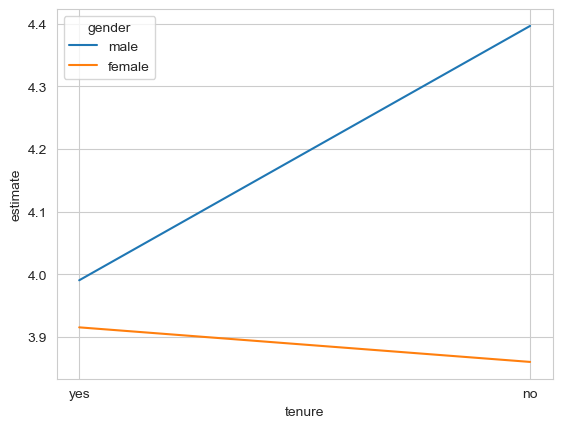

In [10]:
# Your answer here
# plot
sns.lineplot(data=anova_predictions,
             y='estimate', x='tenure',
             hue='gender')

The ANOVA suggested we had the following results:
1. A main effect of gender (differences between men and women, ignoring tenure status)
2. A main effect of tenure (differences between tenured and non-tenured, ignoring gender)
3. An interaction, indicating the difference between one variable (e.g. gender) at one level of the other (say tenured) is different to the other (confusing!)

Have the model make predictions, and to explore the main effects, use the `by` keyword to ignore one variable and the `hypothesis` keyword to check the differences.

In [11]:
# Your answer here
# Main effects
# Gender
me.predictions(anova_model, newdata=anova_predmat, by='gender', hypothesis='pairwise')

# Tenure
me.predictions(anova_model, newdata=anova_predmat, by='tenure', hypothesis='pairwise')

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",0.175352,0.060417,2.902376,0.003703,8.076918,0.056937,0.293766


Now use the predictions to figure out the 'cause' of the interaction. There are a few ways to do this. You can compare men and women professors who are tenured, and see if that difference is significant, and then see if the difference between non-tenured professors is also significant. What do you observe?

In [12]:
# Your answer here
me.predictions(anova_model, newdata=anova_predmat, hypothesis='b1=b2') # Tenured, NON significant
me.predictions(anova_model, newdata=anova_predmat, hypothesis='b3=b4') # Non-tenured, significant, males > females

# Slopes
me.slopes(anova_model, newdata=anova_predmat, variables='tenure', by='gender')

gender,term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,str,str,f64,f64,f64,f64,f64,f64,f64
"""female""","""tenure""","""mean(yes) - mean(no)""",0.055172,0.08796,0.627241,0.530501,0.914573,-0.117227,0.227572
"""male""","""tenure""","""mean(yes) - mean(no)""",-0.405876,0.082847,-4.899093,9.6280e-7,19.98626,-0.568254,-0.243499


### e. ANCOVA done with marginal effects
Let us now add some complexity. ANCOVA is often described as an ANOVA 'adjusting' for another variable. We know it simply as a general linear model, with some kind of categorical predictor, and other continuous predictors that are also in the model. There can be as many categorical predictors and interactions between them as needed, as well as the continuous covariates.

ANCOVA is a confusing and unnecessary term. Linear models are simpler, and here we will see how. 

First, carry out an ANCOVA with `pingouin` that looks at teaching evaluations between men and women (the categorical predictor), but adjusts for their beauty (the continuous covariate). Print the result. What does it tell you?


In [13]:
# Your answer here
# ANCOVA in pingouin
pg.ancova(data=profs, dv='eval', between='gender', covar='beauty')

,Source,SS,DF,F,p-unc,np2
0,gender,4.346745,1,15.055490,0.000120,0.031692
1,beauty,6.243877,1,21.626444,0.000004,0.044903
2,Residual,132.808865,460,NaN,NaN,NaN


You should see that there are significant effects of both gender and beauty, but there's little information of use here. 

Fit a linear model that is equivalent to this ANCOVA, called `ancova_mod`. Print the summary.

In [14]:
# Your answer here
ancova_mod = smf.ols('eval ~ gender + beauty', data=profs).fit()
ancova_mod.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.062
No. Observations:                 463   F-statistic:                     16.33
Covariance Type:            nonrobust   Prob (F-statistic):           1.41e-07
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8838      0.039    100.468      0.000       3.808       3.960
gender[T.male]     0.1978      0.051      3.880      0.000       0.098       0.298
beauty             0.1486      0.032      4.650      0.000       0.086       0.211
==================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now make a prediction about teaching evaluations for females and males. As the variable we want to control for is in the model (beauty), we don't need to make any predictions for it.

In [15]:
# Your answer
# Predictions and contrast
me.predictions(ancova_mod, 
               hypothesis='pairwise',
               newdata=me.datagrid(ancova_mod,
                                   gender=['male', 'female'])
              )

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",0.19781,0.05098,3.880141,0.000104,13.225646,0.097891,0.297729


Repeat the analysis without the beauty covariate. Is the difference smaller or larger with the effect of beauty removed?

In [16]:
# Your answer
# T-test style model
ancova_mod = smf.ols('eval ~ gender', data=profs).fit()

# Predictions and contrast
me.predictions(ancova_mod, 
               hypothesis='pairwise',
               newdata=me.datagrid(ancova_mod,
                                   gender=['male', 'female'])
              )

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",0.168004,0.051695,3.249939,0.001154,9.758768,0.066685,0.269324


### f. Knowledge of linear models gets you out of trouble
Following on from the last example, lets say we want to examine the interaction between gender and tenure status and control for beauty. Perhaps we wish to see whether our earlier ANOVA model stands up if we incorporate and control for beauty.

First, try to fit one of these models in `pingouin`. Its another ANCOVA, but this time has two between factors.

In [17]:
# Your answer here
#pg.ancova(data=profs, dv='eval', between=['tenure', 'gender'], covar='beauty')

If you did this correctly, you should see an error - the software doesn't support it!

But we can easily fit a linear model to do this. Fit a model that has an interaction between gender and tenure, and has beauty as a predictor.

In [18]:
# Your answer here
# More complex ANCOVA
ancova2 = smf.ols('eval ~ beauty + gender * tenure', data=profs).fit()
ancova2.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.096
No. Observations:                 463   F-statistic:                     13.23
Covariance Type:            nonrobust   Prob (F-statistic):           3.32e-10
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        3.8804      0.075     51.883      0.000       3.733       4.027
gender[T.male]                   0.4890      0.105      4.650      0.000       0.282       0.696
tenure[T.yes]                    0.0076      0.087      0.087      0.930      -0.164       0.179
gender[T.male]:tenure[T.yes]    -0.3668      0.121     -3.027      0.003      -0.605      -0.129
beauty                           0.1289      0.032      4.032      0.000       0.066       0.192
================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Once you have this model, use it to make predictions about gender and tenure as before, and work out the interaction effects. Are they the same as before?

In [19]:
# Your answer here
# I will use slopes
me.slopes(ancova2, newdata=anova_predmat, variables='tenure', by='gender')

gender,term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,str,str,f64,f64,f64,f64,f64,f64,f64
"""female""","""tenure""","""mean(yes) - mean(no)""",0.007626,0.087334,0.087315,0.930421,0.104044,-0.163546,0.178798
"""male""","""tenure""","""mean(yes) - mean(no)""",-0.359143,0.082324,-4.362546,0.000013,16.247228,-0.520495,-0.197791


Plot it the predictions and check them against the ANOVA predictions.

<Axes: xlabel='tenure', ylabel='estimate'>

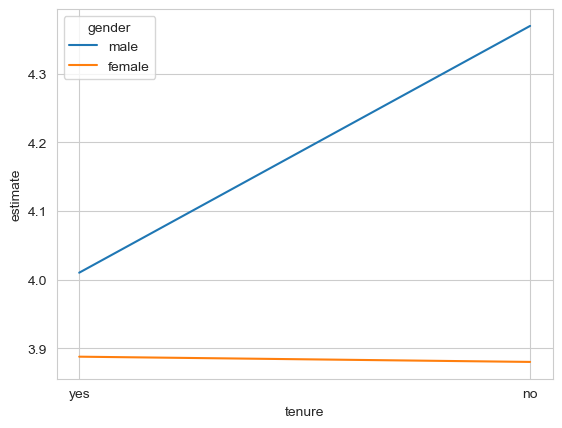

In [20]:
# Your answer here
sns.lineplot(data=me.predictions(ancova2, newdata=anova_predmat),
             y='estimate', x='tenure',
             hue='gender')

### g. Interpreting complex interactions with marginal effects
If you've completed the above exercises, you've mastered 99% of the statistics used in basic psychology, and learned how to do it from a much clearer perspective. Lets now build knowledge of how to interpret an even more complex model. 

Lets suppose that, rather than controlling for beauty's influence on teaching evaluations for tenured and non-tenured males and females, you want to know whether it influences evaluations at these combinations. That is, you might wish to see how less attractive males are evaluated before and after tenure, and whether this change is different for females, who are typically judged more harshly on their looks. 

To do this, you will need an interaction between gender, beauty, and tenure. Fit a model that does this, and call it `three_interact`. Print the summary.

In [21]:
# Your answer here
# three variable interaction
three_interact = smf.ols('eval ~ gender * beauty * tenure', data=profs).fit()
three_interact.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.097
No. Observations:                 463   F-statistic:                     8.055
Covariance Type:            nonrobust   Prob (F-statistic):           3.03e-09
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               3.8601      0.076     51.031      0.000       3.711       4.009
gender[T.male]                          0.5076      0.107      4.741      0.000       0.297       0.718
tenure[T.yes]                           0.0275      0.088      0.312      0.755      -0.146       0.201
gender[T.male]:tenure[T.yes]           -0.3781      0.122     -3.100      0.002      -0.618      -0.138
beauty                                  0.0006      0.080      0.008      0.994      -0.156       0.157
gender[T.male]:beauty                   0.1362      0.124      1.094      0.274      -0.108       0.381
beauty:tenure[T.yes]                    0.1301      0.099      1.315      0.189      -0.064       0.325
gender[T.male]:beauty:tenure[T.yes]    -0.0934      0.146     -0.640      0.522      -0.380       0.193
=======================================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Confusion abounds looking at the coefficients. Lets make sense of this by asking for predictions from the model. Generate a data grid that asks for beauty to be evaluated at [-2, 0, 2] (that's -2 standard devs below average, average, and 2 above, as the variable is scaled so by the authors), for tenured and non-tenured males and females.

In [22]:
# Your answer here
# Get predictions
predmat = me.datagrid(three_interact, 
                      gender=['male', 'female'],
                      tenure=['yes', 'no'],
                      beauty=[-2, 0, 2])

# Show
predmat

gender,tenure,beauty,rownames,minority,age,credits,eval,division,native,students,allstudents,prof
str,str,i64,i64,str,i64,str,f64,str,str,i64,i64,i64
"""male""","""yes""",-2,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34
"""male""","""yes""",0,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34
"""male""","""yes""",2,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34
"""male""","""no""",-2,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34
"""male""","""no""",0,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34
…,…,…,…,…,…,…,…,…,…,…,…,…
"""female""","""yes""",0,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34
"""female""","""yes""",2,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34
"""female""","""no""",-2,243,"""no""",52,"""more""",3.998272,"""upper""","""yes""",12,15,34


Once done, ask the model to predict the outcomes, and plot them. There are now three variables to deal with - so think carefully how you plot them!

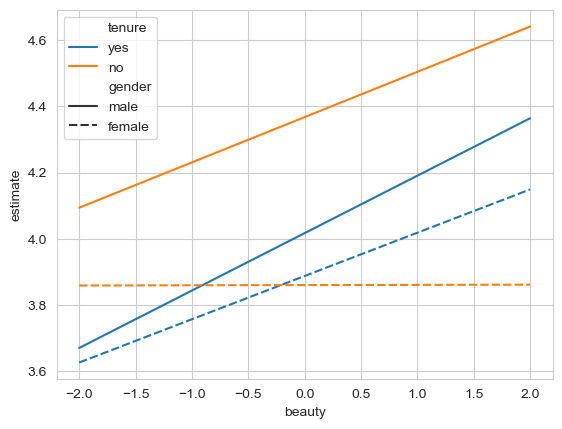

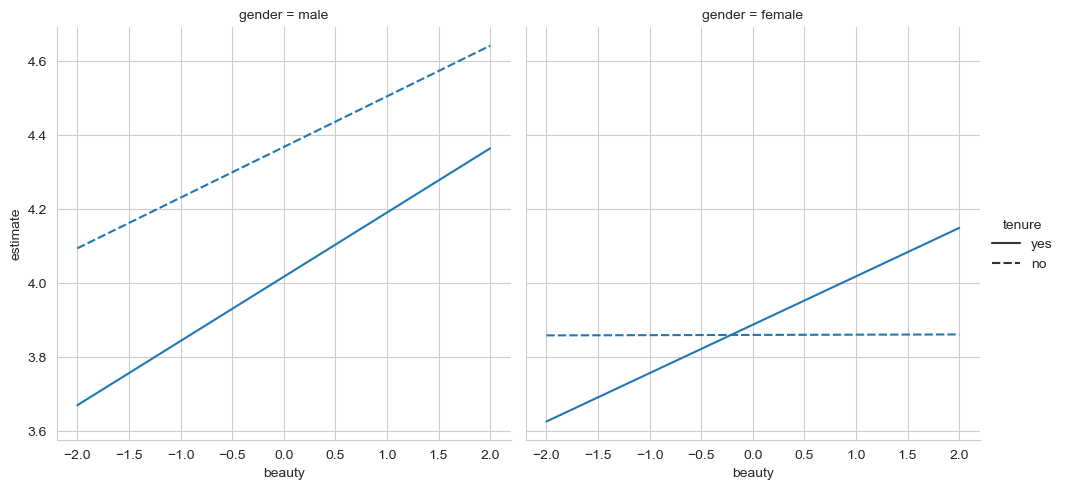

In [23]:
# Your answer here
# Predictions
three_preds = me.predictions(three_interact, newdata=predmat)

# Plot to show interaction pattern overall - lots of ways to do this, e.g.
sns.lineplot(data=three_preds,
             x='beauty', 
             y='estimate',
             style='gender',
             hue='tenure')

# Or
sns.relplot(data=three_preds,
            x='beauty', y='estimate',
            style='tenure', col='gender',
            kind='line')


If you have visualised it correctly, you should see the general pattern that male evaluations increase with beauty, but they are lower with tenure. Females on the other only show a positive beauty association *with* tenure, and no association without it.

Now, are those differences meaningful? To test that we need to make a decision about how we want to evaluate our interaction. That depends on the question, since there are many ways to interpret interactions of this complexity.

Do this in steps. First, is the association between beauty and evaluations different for females and males? 

In [24]:
# Your answer here
# Slopes are required
me.slopes(three_interact, newdata=predmat, variables='beauty', by=['gender'], hypothesis='pairwise')

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",-0.08949,0.072316,-1.237495,0.215903,2.211543,-0.231226,0.052246


Is the association between beauty and evaluations different between tenure status?

In [25]:
# Your answer here
me.slopes(three_interact, newdata=predmat, variables='beauty', by=['tenure'], hypothesis='pairwise')

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""Row 1 - Row 2""",-0.083401,0.073588,-1.133351,0.257067,1.959784,-0.227632,0.060829


Finally, generate the slopes for all four conditions (male, female, tenured, non-tenured).

In [26]:
# Your answer here
me.slopes(three_interact, newdata=predmat, variables='beauty', by=['tenure', 'gender'])

gender,tenure,term,contrast,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,str,str,str,f64,f64,f64,f64,f64,f64,f64
"""female""","""no""","""beauty""","""mean(dY/dX)""",0.000639,0.077896,0.008202,0.993456,0.009472,-0.152034,0.153312
"""male""","""no""","""beauty""","""mean(dY/dX)""",0.136852,0.095617,1.431256,0.152357,2.714474,-0.050553,0.324257
"""female""","""yes""","""beauty""","""mean(dY/dX)""",0.130763,0.058609,2.231099,0.025675,5.283515,0.015891,0.245636
"""male""","""yes""","""beauty""","""mean(dY/dX)""",0.17353,0.04884,3.553072,0.000381,11.358831,0.077807,0.269254


Finally, lets ask a sex-specific question of the model. Compare the slopes of females who are tenured and non-tenured here - are they different?

In [27]:
# Your answer here
me.slopes(three_interact, newdata=predmat, 
          variables='beauty', by=['tenure', 'gender'],
          hypothesis='b1=b3')

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""b1=b3""",-0.130124,0.098895,-1.315782,0.188247,2.409299,-0.323955,0.063707


Then compare this for males.

In [28]:
# Your answer here
me.slopes(three_interact, newdata=predmat, 
          variables='beauty', by=['tenure', 'gender'],
          hypothesis='b2=b4')

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""b2=b4""",-0.036678,0.107497,-0.341202,0.732951,0.44821,-0.247369,0.174013


What effect does beauty have on teaching evaluations?

### h. Personalised predictions
For the final exercise, we will work to understand how to use models to make individual predictions. 

We'll use a new dataset, recorded by Daniel Hamermesh, an economist interested in the effects of physical attractiveness in the labour market (e.g. the halo effect). You can find this dataset (called `beauty` by the authors), here: https://vincentarelbundock.github.io/Rdatasets/csv/wooldridge/beauty.csv

Also, you can see a description of these predictors here: https://vincentarelbundock.github.io/Rdatasets/doc/wooldridge/beauty.html
Take a look!

Read it into a dataframe called `beauty`, and print the first 5 rows.

In [29]:
# Your answer here
beauty = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/wooldridge/beauty.csv')
beauty.head()

,rownames,wage,lwage,belavg,abvavg,exper,looks,union,goodhlth,black,female,married,south,bigcity,smllcity,service,expersq,educ
0,1,5.73,1.745715,0,1,30,4,0,1,0,1,1,0,0,1,1,900,14
1,2,4.28,1.453953,0,0,28,3,0,1,0,1,1,1,0,1,0,784,12
2,3,7.96,2.074429,0,1,35,4,0,1,0,1,0,0,0,1,0,1225,10
3,4,11.57,2.448416,0,0,38,3,0,1,0,0,1,0,1,0,1,1444,16
4,5,11.42,2.435366,0,0,27,3,0,1,0,0,1,0,0,1,0,729,16


We will aim to build a model that predicts wages/income from a series of predictors, one of which includes `looks`, which runs from 1 - 5 (5 being very attractive). Specifically, we'll use:

- Looks
- years of workforce experience
- union member status
- health status
- ethnicity (here only black vs other)
- sex
- years of education

Using the description in the above link, build a linear regression model that predicts wages from those variables.

In [30]:
# Your answer here
beauty_mod = smf.ols('wage ~ looks + female + exper + union + goodhlth + black + educ', data=beauty).fit()
beauty_mod.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.192
No. Observations:                1260   F-statistic:                     43.61
Covariance Type:            nonrobust   Prob (F-statistic):           2.48e-55
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4917      0.952     -1.567      0.117      -3.359       0.376
looks          0.3944      0.176      2.237      0.025       0.049       0.740
female        -2.4942      0.260     -9.603      0.000      -3.004      -1.985
exper          0.0860      0.011      8.145      0.000       0.065       0.107
union          0.7966      0.268      2.969      0.003       0.270       1.323
goodhlth      -0.0606      0.481     -0.126      0.900      -1.004       0.882
black          0.0028      0.460      0.006      0.995      -0.899       0.904
educ           0.4520      0.047      9.630      0.000       0.360       0.544
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Despite the number of variables, with some effort we could interpret these coefficients. For example, we might say that as your looks are rated one point higher on the scale, your hourly wage increases by .39 cents, all else being equal. But it becomes more difficult when trying to interpret the implications across multiple predictors. 

Use the model to generate predictions for two individuals, one male and one female. The female should have 17 years of education and the male 12 (about average). 

What's the difference in their wages? Is it statistically significant?

In [31]:
# Your answer here
me.predictions(beauty_mod,
               newdata=me.datagrid(beauty_mod, 
                                   female=[1, 0],
                                   educ=[17, 12]),
               hypothesis='b1=b4'
              )

term,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high
str,f64,f64,f64,f64,f64,f64,f64
"""b1=b4""",-0.234265,0.353636,-0.662446,0.507685,0.977993,-0.927378,0.458849


Consider next the implications of looks on earnings. 

What's the difference in earnings for a male with 5 years work experience, 15 years of education, who has a 5 in terms of looks, and a counterpart who has the same values but has a 3 on looks?

In [32]:
# Your answer here
me.predictions(beauty_mod,
               newdata=me.datagrid(beauty_mod, 
                                   female=[0],
                                   exper=[5],
                                   educ=[15],
                                   looks=[3, 5])
              )

female,exper,educ,looks,rowid,estimate,std_error,statistic,p_value,s_value,conf_low,conf_high,rownames,wage,lwage,belavg,abvavg,union,goodhlth,black,married,south,bigcity,smllcity,service,expersq
i64,i64,i64,i64,i32,f64,f64,f64,f64,f64,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
0,5,15,3,0,6.840791,0.247582,27.63043,0.0,inf,6.35554,7.326042,390,6.30669,1.6588,0,0,0,1,0,1,0,0,0,0,100
0,5,15,5,1,7.629543,0.371084,20.560132,0.0,inf,6.902231,8.356855,390,6.30669,1.6588,0,0,0,1,0,1,0,0,0,0,100


If you have mastered the above exercise, then you have a solid understanding of how most of the modern world works - for example, insurance companies use this exact approach to determine your premiums! As ever, these inferences are only as good as the model and the data. 